In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


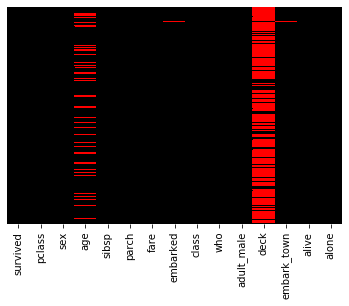

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'flag_r')

In [8]:
df = df.drop(['deck'],axis=1)
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [9]:
plt.style.use('ggplot')

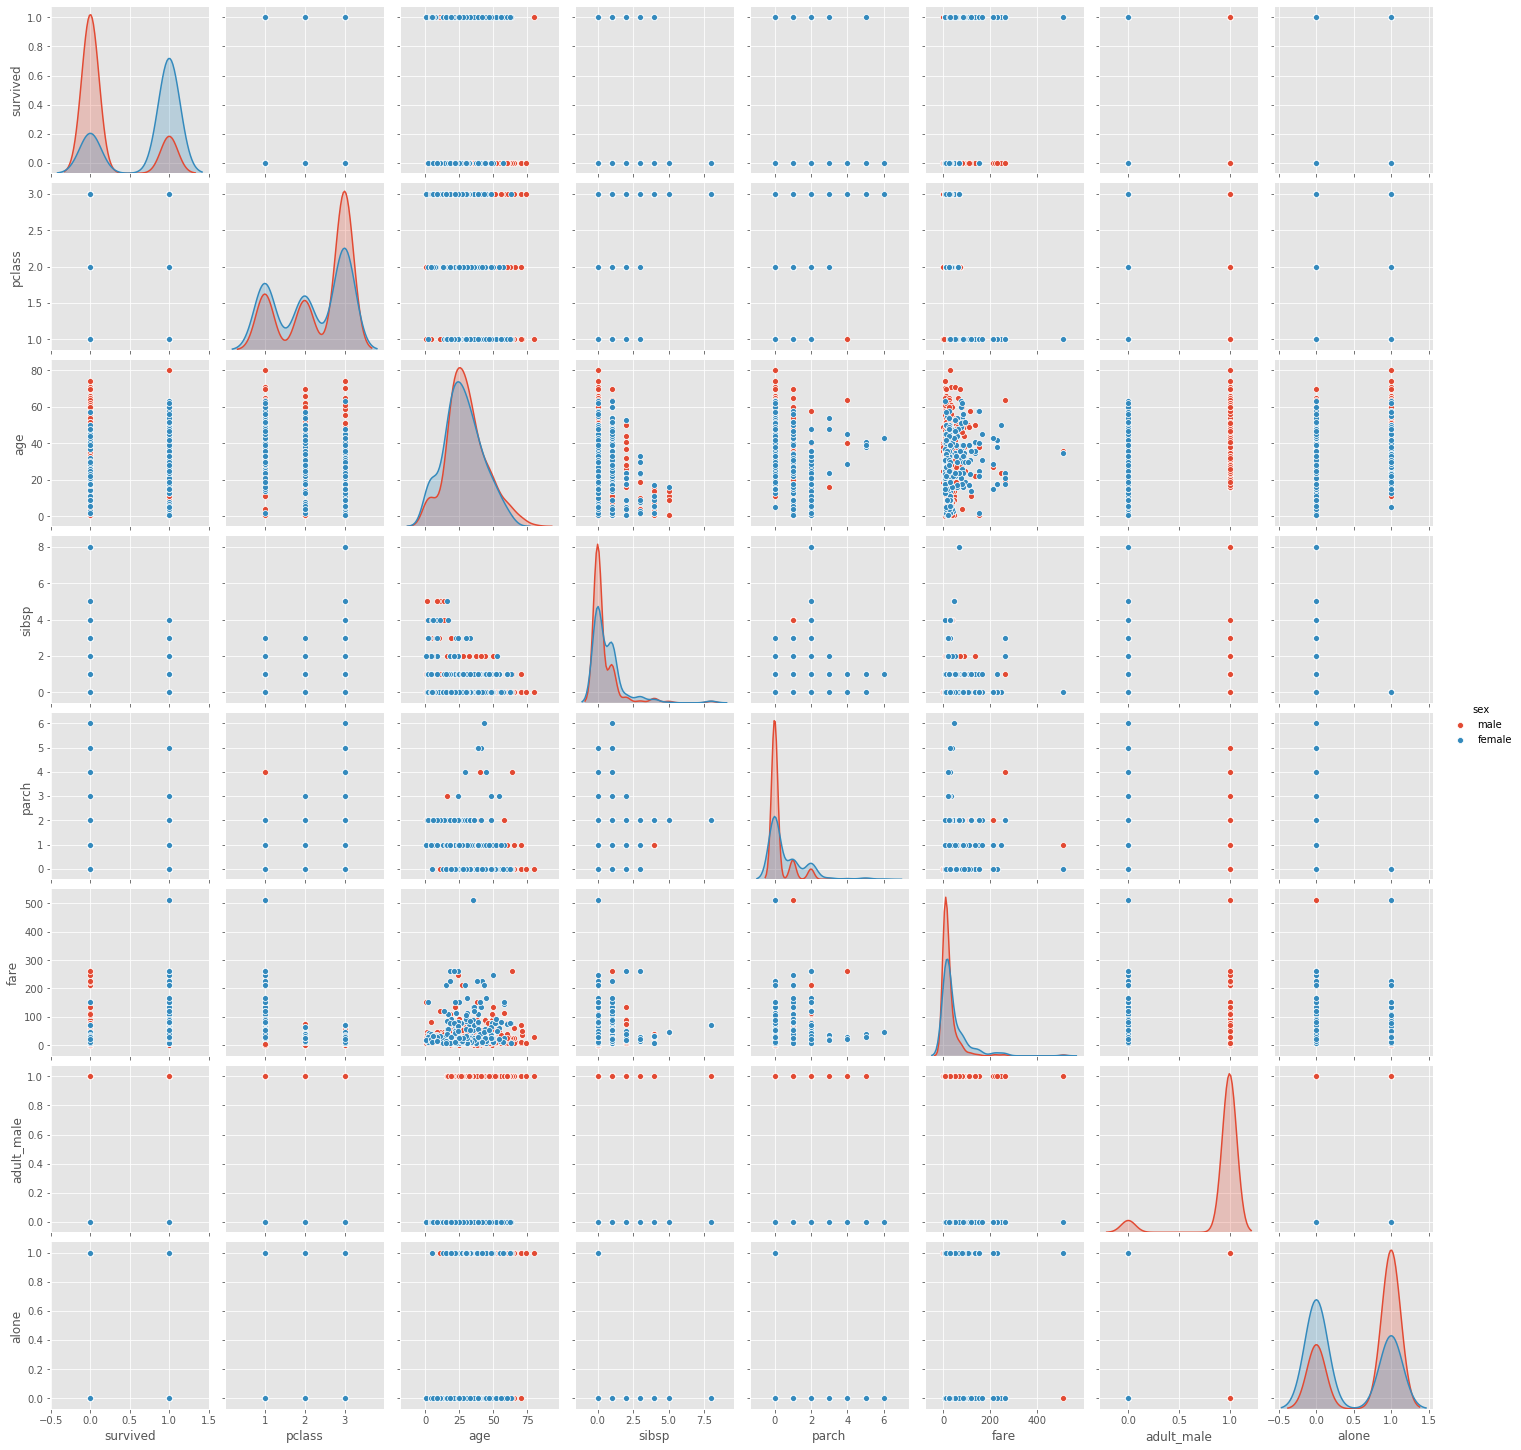

In [10]:
sns.pairplot(df,hue='sex')

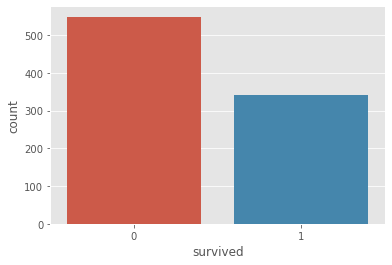

In [11]:
sns.countplot(df['survived'])

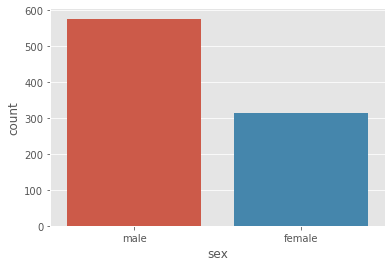

In [12]:
sns.countplot(df['sex'])

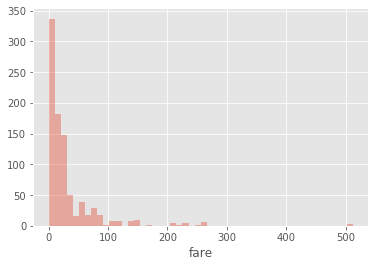

In [13]:
sns.distplot(df['fare'],kde=False)

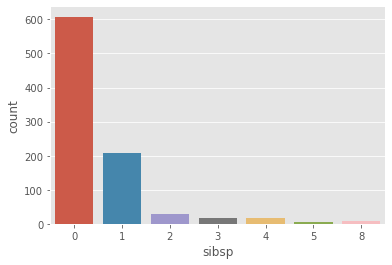

In [14]:
sns.countplot(df['sibsp'])

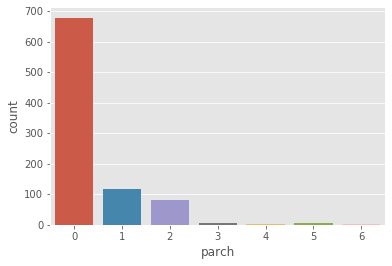

In [15]:
sns.countplot(df['parch'])

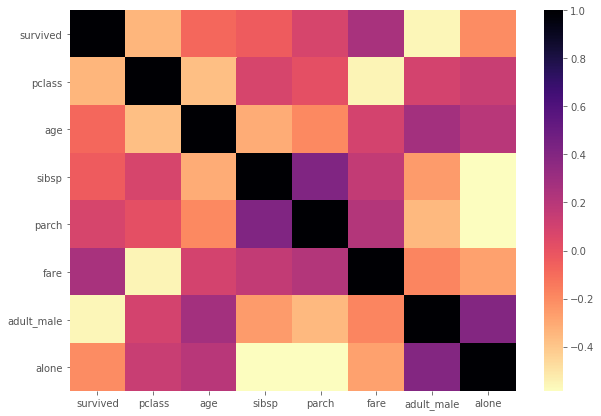

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='magma_r')

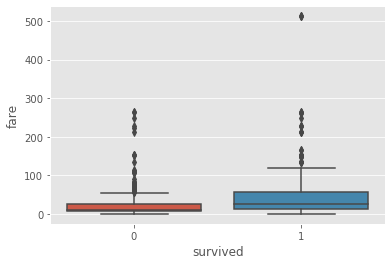

In [17]:
sns.boxplot(data=df, x='survived', y='fare')

In [18]:
pd.crosstab(df['sex'],df['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


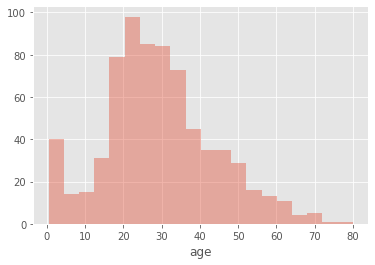

In [19]:
sns.distplot(df['age'],kde=False)

In [20]:
print("Before imputation:\n")

print("The mean age onboard: ",np.mean(df['age']))
print("The maximum age onboard: ",np.max(df['age']))
print("The minimum age onboard: ",np.min(df['age']))
print("The standard deviation: ",np.std(df['age'])) 

Before imputation:

The mean age onboard:  29.69911764705882
The maximum age onboard:  80.0
The minimum age onboard:  0.42
The standard deviation:  14.516321150817316


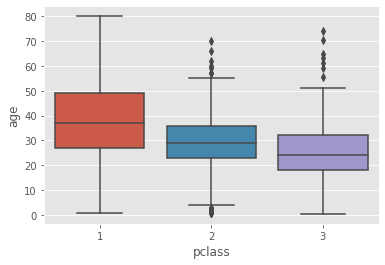

In [21]:
sns.boxplot(data=df, x='pclass', y='age')

# Feature engineering

In [22]:
print("Since there are a lot of missing values for the variable 'AGE', the values need to be imputed\n")

#imputation

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    
    else:
        return age
    

df['age']=df[['age','pclass']].apply(impute_age,axis=1)

Since there are a lot of missing values for the variable 'AGE', the values need to be imputed



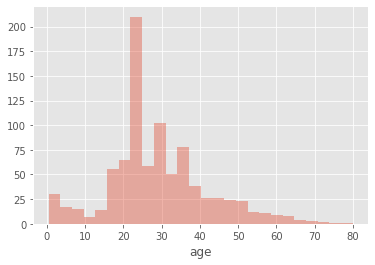

In [23]:
sns.distplot(df['age'],kde=False)

In [24]:
print("After imputation:\n")

print("The mean age onboard: ",np.mean(df['age']))
print("The maximum age onboard: ",np.max(df['age']))
print("The minimum age onboard: ",np.min(df['age']))
print("The standard deviation: ",np.std(df['age'])) 

After imputation:

The mean age onboard:  29.06640852974186
The maximum age onboard:  80.0
The minimum age onboard:  0.42
The standard deviation:  13.237097358289471


In [25]:
df = df.drop(['embark_town'],axis=1)

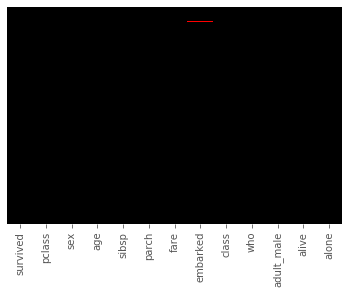

In [26]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'flag_r')

In [27]:
Sex = pd.get_dummies(df['sex'],drop_first=True)

In [28]:
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [29]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
df = df.drop(['sex','embarked'], axis=1)
df.head(4)

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,35.0,1,0,53.1000,First,woman,False,yes,False


In [32]:
df = df.drop(['adult_male','alive','alone','who'],axis=1)
df.head(4)

,survived,pclass,age,sibsp,parch,fare,class
0,0,3,22.0,1,0,7.2500,Third
1,1,1,38.0,1,0,71.2833,First
2,1,3,26.0,0,0,7.9250,Third
3,1,1,35.0,1,0,53.1000,First


In [33]:
df = df.drop(['class'],axis=1)
df.head(4)

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000


In [34]:
PClass = pd.get_dummies(df['pclass'],drop_first=True)

In [35]:
df = pd.concat([df,Sex,PClass,embark], axis=1)

In [36]:
df.head(4)

,survived,pclass,age,sibsp,parch,fare,male,2,3,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,0,1


# Logistic Regression:

In [37]:
df.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 2, 3,
       'Q', 'S'],
      dtype='object')

In [38]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'male', 2, 3,
       'Q', 'S']]
y = df['survived']

In [40]:
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [41]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=1/3,random_state=0)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_hat = lr.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
print("Precision, Recall, F1-score:\n")
print(classification_report(y_test,y_hat))
print("\nAccuracy:")
print(accuracy_score(y_test,y_hat))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_hat))


Precision, Recall, F1-score:

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       363
          1       0.81      0.68      0.74       231

avg / total       0.81      0.81      0.81       594


Accuracy:
0.8114478114478114

Confusion Matrix:
[[325  38]
 [ 74 157]]
